# MNIST 추론

In [1]:
import sys, os
sys.path.append("./dataset")

import numpy as np
import pickle
from dataset.mnist import load_mnist
import matplotlib.pylab as plt
import requests
import json

# MNIST 데이터 로딩

In [2]:
(train_image_data, train_label_data), (test_image_data, test_label_data) = load_mnist(flatten = True, normalize = False)

# 추론

In [3]:
def mnist_inference(n):
    image = train_image_data[n]
    image_reshaped = image.reshape(28, 28)
    image_reshaped.shape
    label = train_label_data[n]
    plt.figure(figsize = (4, 4))
    plt.title("sample of " + str(label))
    plt.imshow(image_reshaped, cmap="gray")
    plt.show()
    
    image_4d = image.reshape(-1, 28, 28, 1)
    headers = {"content-type": "application/json"}
    payload = json.dumps({"signature_name": "serving_default",
                          "instances": image_4d.tolist()})
    json_response = requests.post('http://localhost:8501/v1/models/mnist:predict',
                                   data=payload, headers=headers)
    prediction_list = json_response.json()['predictions'][0]
    prediction = prediction_list.index(max(prediction_list))
    
    return "prediction result:{}".format(prediction)

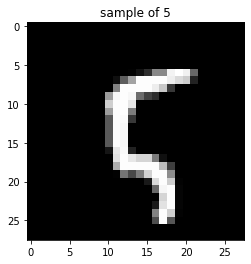

'prediction result:1'

In [8]:
mnist_inference(100)